<ipython-input-3-5601284f4f0a>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range('2023-01-01', '2023-12-31', freq='H')
<ipython-input-3-5601284f4f0a>:55: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_max = df.groupby(['年', '月']).apply(lambda x: x.nlargest(1, 'PM2.5'))
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font

原始數據範例:
                   時間  測站      PM2.5     年   月   日   時
0 2023-10-30 22:00:00  三重  30.966670  2023  10  30  22
1 2023-02-05 20:00:00  永和  18.402111  2023   2   5  20
2 2023-08-13 14:00:00  中和  73.600397  2023   8  13  14
3 2023-08-05 07:00:00  中和  35.888277  2023   8   5   7
4 2023-08-27 22:00:00  中和  35.208939  2023   8  27  22


PM2.5 最高的前10筆記錄:
                     時間  測站      PM2.5
103 2023-10-15 22:00:00  板橋  74.485731
2   2023-08-13 14:00:00  中和  73.600397
110 2023-10-21 03:00:00  三重  73.401268
228 2023-04-02 16:00:00  三重  72.903986
195 2023-05-05 00:00:00  永和  71.829502
464 2023-07-07 03:00:00  永和  71.051234
170 2023-07-25 11:00:00  永和  69.483472
257 2023-11-30 04:00:00  永和  67.448821
371 2023-12-05 18:00:00  新莊  67.134055
450 2023-10-27 10:00:00  板橋  66.325621


PM2.5 最低的前10筆記錄:
                     時間  測站    PM2.5
16  2023-09-25 12:00:00  中和  5.00000
19  2023-05-22 01:00:00  中和  5.00000
56  2023-01-07 17:00:00  新莊  5.00000
281 2023-12-13 15:00:00  三重  5.00000
325 2023-0

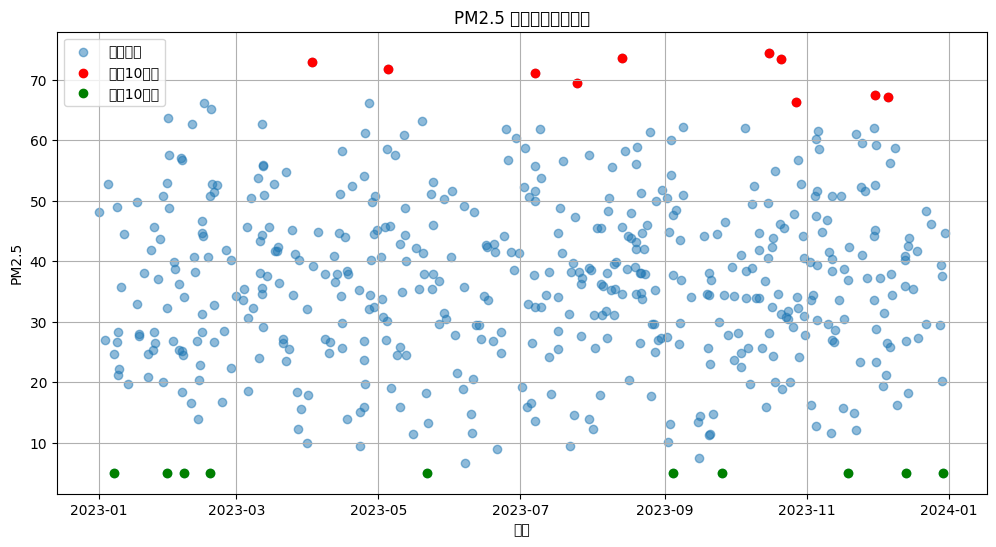

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
dates = pd.date_range('2023-01-01', '2023-12-31', freq='H')
stations = ['三重', '新莊', '板橋', '中和', '永和']
data = {
    '時間': np.random.choice(dates, 500),
    '測站': np.random.choice(stations, 500),
    'PM2.5': np.random.normal(35, 15, 500).clip(5, 100)  # 生成5-100之間的PM2.5值
}
df = pd.DataFrame(data)

# 轉換時間格式/提取時間成分
df['時間'] = pd.to_datetime(df['時間'])
df['年'] = df['時間'].dt.year
df['月'] = df['時間'].dt.month
df['日'] = df['時間'].dt.day
df['時'] = df['時間'].dt.hour

# 顯示前5行數據
print("原始數據範例:")
print(df.head())
print("\n")

# 1. 使用 nlargest() 找 PM2.5 最高的前10筆記錄
top_10_pm25 = df.nlargest(10, 'PM2.5')
print("PM2.5 最高的前10筆記錄:")
print(top_10_pm25[['時間', '測站', 'PM2.5']])
print("\n")

# 2. 使用 nsmallest() 找 PM2.5 最低的前10筆記錄
bottom_10_pm25 = df.nsmallest(10, 'PM2.5')
print("PM2.5 最低的前10筆記錄:")
print(bottom_10_pm25[['時間', '測站', 'PM2.5']])
print("\n")

# 3. 對三重站的數據用 nlargest() 和 nsmallest()
sanchong = df[df['測站'] == '三重']
if not sanchong.empty:
    top_5_sanchong = sanchong.nlargest(5, 'PM2.5')
    bottom_5_sanchong = sanchong.nsmallest(5, 'PM2.5')

    print("三重站 PM2.5 最高的前5筆記錄:")
    print(top_5_sanchong[['時間', 'PM2.5']])
    print("\n三重站 PM2.5 最低的前5筆記錄:")
    print(bottom_5_sanchong[['時間', 'PM2.5']])
else:
    print("三重站無數據")
print("\n")

# 4. 按月份分組後用 nlargest() 找出每個月 PM2.5 最高的一天
monthly_max = df.groupby(['年', '月']).apply(lambda x: x.nlargest(1, 'PM2.5'))
print("每個月 PM2.5 最高的一天:")
print(monthly_max[['時間', '測站', 'PM2.5']])

# 可視化最高和最低PM2.5值
plt.figure(figsize=(12, 6))
plt.scatter(df['時間'], df['PM2.5'], alpha=0.5, label='所有數據')
plt.scatter(top_10_pm25['時間'], top_10_pm25['PM2.5'], color='red', label='最高10個值')
plt.scatter(bottom_10_pm25['時間'], bottom_10_pm25['PM2.5'], color='green', label='最低10個值')
plt.title('PM2.5 最高和最低值標記')
plt.xlabel('時間')
plt.ylabel('PM2.5')
plt.legend()
plt.grid()
plt.show()